In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the data
df = pd.read_csv('Final_Dataset.csv')
df.head(10)

,Age,GenderLabel,MaritalStatusLabel,IncomeLevelLabel,LoginFrequency,ServiceUsageLabel,CustomerTotalAmountSpent,InquiryInteraction,InquiryStatusResolved,InquiryStatusUnResolved,FeedBackInteraction,FeedBackStatusResolved,FeedBackStatusUnresolved,ComplaintInteraction,ComplaintStatusResolved,ComplaintStatusUnresolved,ChurnStatus
0,1.229628,1,1,1,0.575702,1,-1.152196,1.336775,2.094608,-0.389005,-0.620690,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
1,1.426547,1,2,1,-1.488513,2,0.379758,1.336775,2.094608,-0.389005,-0.620690,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,1
2,-1.658518,1,1,1,-1.630872,2,0.590481,1.336775,2.094608,-0.389005,-0.620690,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
3,-1.461599,1,3,1,-1.702052,2,-0.473822,3.265742,2.094608,2.409591,-0.620690,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
4,-1.461599,1,4,2,1.073961,2,0.994845,-0.592193,-0.422950,-0.389005,-0.620690,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
5,0.901430,0,4,2,-1.702052,2,-0.139233,-0.592193,-0.422950,-0.389005,1.103448,1.880681,-0.408836,-0.612876,-0.435474,-0.405964,0
6,-1.067761,0,2,3,0.433343,1,-1.598905,-0.592193,-0.422950,-0.389005,-0.620690,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
7,-0.411364,1,1,1,-0.634355,3,1.056331,1.336775,-0.422950,2.409591,1.103448,-0.467235,2.130519,-0.612876,-0.435474,-0.405964,1
8,-0.280085,1,4,3,-0.136096,2,0.067954,1.336775,2.094608,-0.389005,-0.620690,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
9,1.623466,1,2,3,0.219803,3,0.176485,-0.592193,-0.422950,-0.389005,-0.620690,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,1


In [17]:
# Exploratory Data Analysis
print("Dataset Shape:", df.shape)
print("\nChurn Distribution:")
print(df['ChurnStatus'].value_counts())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (1000, 17)

Churn Distribution:
ChurnStatus
0    796
1    204
Name: count, dtype: int64

Missing Values:
Age                          0
GenderLabel                  0
MaritalStatusLabel           0
IncomeLevelLabel             0
LoginFrequency               0
ServiceUsageLabel            0
CustomerTotalAmountSpent     0
InquiryInteraction           0
InquiryStatusResolved        0
InquiryStatusUnResolved      0
FeedBackInteraction          0
FeedBackStatusResolved       0
FeedBackStatusUnresolved     0
ComplaintInteraction         0
ComplaintStatusResolved      0
ComplaintStatusUnresolved    0
ChurnStatus                  0
dtype: int64


In [18]:
# Prepare features and target
X = df.drop('ChurnStatus', axis=1)
y = df['ChurnStatus']

In [19]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [20]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42)
}

In [21]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42)
}

# Model training and evaluation
results = {}
best_model = None
best_score = 0

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"TRAINING: {name.upper()}")
    print(f"{'='*70}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = model.score(X_test, y_test)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    # Get classification report as dictionary
    report_dict = classification_report(y_test, y_pred, target_names=['Non-Churn', 'Churn'], output_dict=True)
    
    # Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Extract metrics directly from classification report
    churn_precision = report_dict['Churn']['precision']
    churn_recall = report_dict['Churn']['recall']
    churn_f1 = report_dict['Churn']['f1-score']
    
    non_churn_precision = report_dict['Non-Churn']['precision']
    non_churn_recall = report_dict['Non-Churn']['recall']
    non_churn_f1 = report_dict['Non-Churn']['f1-score']
    
    # Calculate specificity from confusion matrix
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"\n PERFORMANCE SUMMARY:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   AUC Score: {auc_score:.4f}")
    print(f"   Precision (Churn): {churn_precision:.4f}")
    print(f"   Recall (Churn): {churn_recall:.4f}")
    print(f"   F1-Score (Churn): {churn_f1:.4f}")
    print(f"   Specificity: {specificity:.4f}")
    
    print(f"\n DETAILED CLASSIFICATION REPORT:")
    print("-" * 60)
    print(f"{'Class':<12} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("-" * 60)
    
    for class_name, metrics in report_dict.items():
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            print(f"{class_name:<12} {metrics['precision']:>9.4f} {metrics['recall']:>10.4f} {metrics['f1-score']:>10.4f} {metrics['support']:>10}")
    
    # Print averages
    print("-" * 60)
    print(f"{'Macro Avg':<12} {report_dict['macro avg']['precision']:>9.4f} {report_dict['macro avg']['recall']:>10.4f} {report_dict['macro avg']['f1-score']:>10.4f} {report_dict['macro avg']['support']:>10}")
    print(f"{'Weighted Avg':<12} {report_dict['weighted avg']['precision']:>9.4f} {report_dict['weighted avg']['recall']:>10.4f} {report_dict['weighted avg']['f1-score']:>10.4f} {report_dict['weighted avg']['support']:>10}")
    
    print(f"\n CONFUSION MATRIX:")
    print(f"                    Predicted")
    print(f"                  No Churn   Churn")
    print(f"Actual No Churn [ TN: {cm[0][0]:>4}    FP: {cm[0][1]:>4} ]")
    print(f"Actual Churn    [ FN: {cm[1][0]:>4}    TP: {cm[1][1]:>4} ]")
    
    if auc_score > best_score:
        best_score = auc_score
        best_model = name
        print(f"\n NEW BEST MODEL! {name} achieved AUC: {auc_score:.4f}")

print(f"\n{'='*70}")
print(f" FINAL RESULTS")
print(f"{'='*70}")
print(f"Best Model: {best_model}")
print(f"Best AUC Score: {best_score:.4f}")




TRAINING: LOGISTIC REGRESSION

 PERFORMANCE SUMMARY:
   Accuracy: 0.5674
   AUC Score: 0.6155
   Precision (Churn): 0.5600
   Recall (Churn): 0.6164
   F1-Score (Churn): 0.5868
   Specificity: 0.5188

 DETAILED CLASSIFICATION REPORT:
------------------------------------------------------------
Class        Precision  Recall     F1-Score   Support   
------------------------------------------------------------
Non-Churn       0.5764     0.5188     0.5461      160.0
Churn           0.5600     0.6164     0.5868      159.0
------------------------------------------------------------
Macro Avg       0.5682     0.5676     0.5664      319.0
Weighted Avg    0.5682     0.5674     0.5664      319.0

 CONFUSION MATRIX:
                    Predicted
                  No Churn   Churn
Actual No Churn [ TN:   83    FP:   77 ]
Actual Churn    [ FN:   61    TP:   98 ]

 NEW BEST MODEL! Logistic Regression achieved AUC: 0.6155

TRAINING: RANDOM FOREST

 PERFORMANCE SUMMARY:
   Accuracy: 0.8182
   AUC 

In [23]:
# Print comparative results
print(f"\n MODEL COMPARISON SUMMARY:")
print("-" * 80)
print(f"{'Model':<20} {'Accuracy':<10} {'AUC':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Best'}")
print("-" * 80)
for name, result in results.items():
    # Get the classification report for this model to extract precision, recall, f1
    y_pred = result['predictions']
    report_dict = classification_report(y_test, y_pred, target_names=['Non-Churn', 'Churn'], output_dict=True)
    
    churn_precision = report_dict['Churn']['precision']
    churn_recall = report_dict['Churn']['recall']
    churn_f1 = report_dict['Churn']['f1-score']
    
    best_indicator = "★" if name == best_model else ""
    print(f"{name:<20} {result['accuracy']:.4f}    {result['auc']:.4f}    {churn_precision:.4f}     {churn_recall:.4f}     {churn_f1:.4f}      {best_indicator}")


 MODEL COMPARISON SUMMARY:
--------------------------------------------------------------------------------
Model                Accuracy   AUC        Precision  Recall     F1-Score   Best
--------------------------------------------------------------------------------
Logistic Regression  0.5674    0.6155    0.5600     0.6164     0.5868      
Random Forest        0.8182    0.8935    0.7886     0.8679     0.8263      ★
Gradient Boosting    0.7179    0.7993    0.6865     0.7987     0.7384      
XGBoost              0.8150    0.8881    0.7778     0.8805     0.8260      
SVM                  0.6771    0.7620    0.6522     0.7547     0.6997      


In [24]:
# Hyperparameter tuning for the best model
print(f"\n{'='*70}")
print(f"HYPERPARAMETER TUNING FOR BEST MODEL: {best_model}")
print(f"{'='*70}")

if best_model == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
elif best_model == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
elif best_model == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
else:  # SVM
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'linear']
    }

print(f"Parameter grid for {best_model}:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print(f"\nPerforming hyperparameter tuning for {best_model}...")
grid_search = GridSearchCV(
    models[best_model], param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

print(f"\n Hyperparameter tuning completed!")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation AUC: {grid_search.best_score_:.4f}")


HYPERPARAMETER TUNING FOR BEST MODEL: Random Forest
Parameter grid for Random Forest:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]

Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

 Hyperparameter tuning completed!
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation AUC: 0.8874



 COMPREHENSIVE ANALYSIS OF BEST MODEL: RANDOM FOREST

 1. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------

Top 15 Most Important Features:
---------------------------------------------
 7. CustomerTotalAmountSpent       0.1942
 1. Age                            0.1854
 5. LoginFrequency                 0.1735
 3. MaritalStatusLabel             0.0847
 4. IncomeLevelLabel               0.0622
 6. ServiceUsageLabel              0.0510
 2. GenderLabel                    0.0339
11. FeedBackInteraction            0.0324
14. ComplaintInteraction           0.0319
 8. InquiryInteraction             0.0280
12. FeedBackStatusResolved         0.0235
16. ComplaintStatusUnresolved      0.0232
10. InquiryStatusUnResolved        0.0200
13. FeedBackStatusUnresolved       0.0197
15. ComplaintStatusResolved        0.0187


C:\Users\musha\AppData\Local\Temp\ipykernel_137168\2650992715.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')


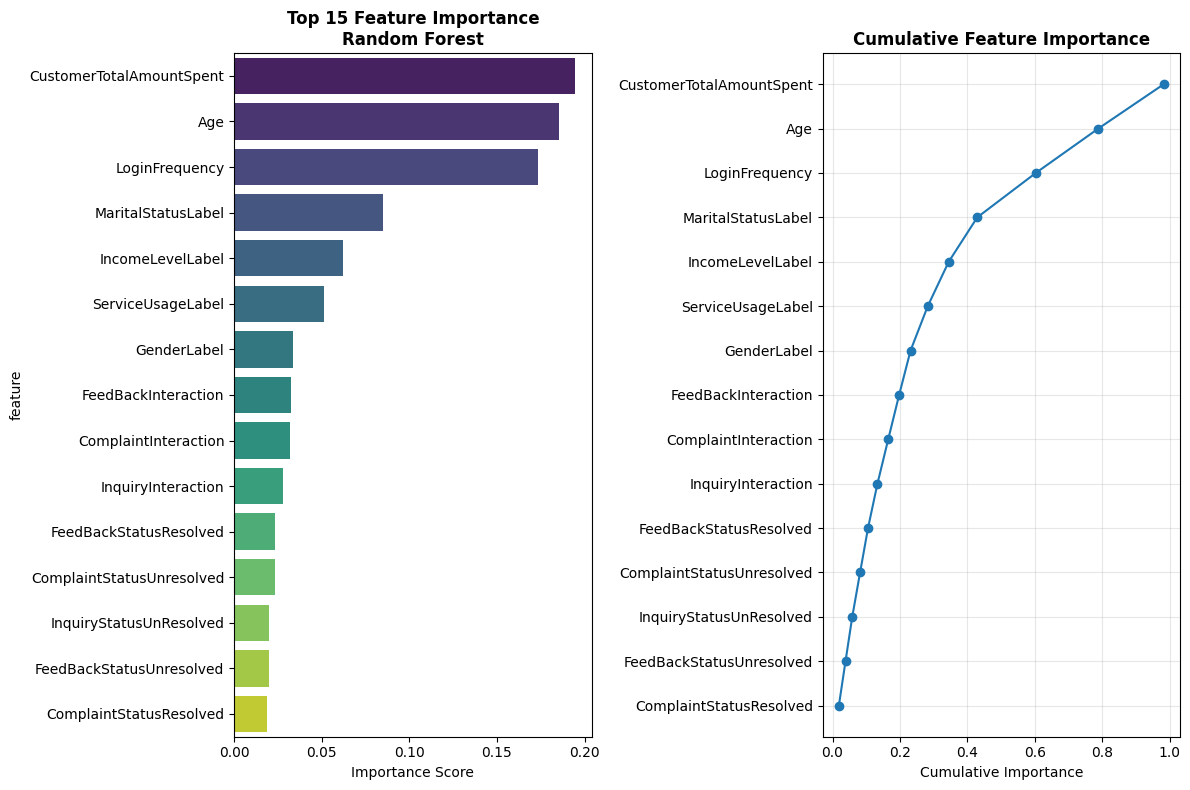


Feature Importance Statistics:
  - Number of features: 16
  - Max importance: 0.1942
  - Min importance: 0.0175
  - Mean importance: 0.0625
  - Features for 80% importance: 8


In [25]:
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, accuracy_score
import datetime
from sklearn.calibration import calibration_curve

# Get the best tuned model
best_tuned_model = grid_search.best_estimator_

# Make predictions with tuned model
y_pred_tuned = best_tuned_model.predict(X_test)
y_pred_proba_tuned = best_tuned_model.predict_proba(X_test)[:, 1]

print(f"\n{'='*70}")
print(f" COMPREHENSIVE ANALYSIS OF BEST MODEL: {best_model.upper()}")
print(f"{'='*70}")

# 1. FEATURE IMPORTANCE ANALYSIS
print(f"\n 1. FEATURE IMPORTANCE ANALYSIS")
print("-" * 50)

if hasattr(best_tuned_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_tuned_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 15 Most Important Features:")
    print("-" * 45)
    for i, row in feature_importance.head(15).iterrows():
        print(f"{i+1:2d}. {row['feature']:<30} {row['importance']:.4f}")
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    
    plt.subplot(1, 2, 1)
    sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
    plt.title(f'Top 15 Feature Importance\n{best_model}', fontweight='bold')
    plt.xlabel('Importance Score')
    
    plt.subplot(1, 2, 2)
    # Cumulative importance
    top_features = top_features.sort_values('importance', ascending=True)
    top_features['cumulative_importance'] = top_features['importance'].cumsum()
    plt.plot(top_features['cumulative_importance'], top_features['feature'], marker='o')
    plt.title('Cumulative Feature Importance', fontweight='bold')
    plt.xlabel('Cumulative Importance')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance statistics
    print(f"\nFeature Importance Statistics:")
    print(f"  - Number of features: {len(feature_importance)}")
    print(f"  - Max importance: {feature_importance['importance'].max():.4f}")
    print(f"  - Min importance: {feature_importance['importance'].min():.4f}")
    print(f"  - Mean importance: {feature_importance['importance'].mean():.4f}")
    
    # Top features contributing to 80% of importance
    cumulative_importance = feature_importance['importance'].cumsum()
    n_features_80 = (cumulative_importance <= 0.8).sum() + 1
    print(f"  - Features for 80% importance: {n_features_80}")
    
else:
    print("Feature importance not available for this model type.")
    
    # For linear models, use coefficients
    if hasattr(best_tuned_model, 'coef_'):
        if len(best_tuned_model.coef_.shape) > 1:
            coefficients = best_tuned_model.coef_[0]
        else:
            coefficients = best_tuned_model.coef_
        
        coef_importance = pd.DataFrame({
            'feature': X.columns,
            'coefficient': coefficients,
            'importance': np.abs(coefficients)
        }).sort_values('importance', ascending=False)
        
        print("\nTop 15 Most Important Features (Coefficients):")
        print("-" * 45)
        for i, row in coef_importance.head(15).iterrows():
            sign = '+' if row['coefficient'] > 0 else '-'
            print(f"{i+1:2d}. {row['feature']:<30} {sign} {abs(row['coefficient']):.4f}")
        
        # Plot coefficients
        plt.figure(figsize=(12, 6))
        top_coefs = coef_importance.head(15).sort_values('coefficient', ascending=True)
        
        colors = ['red' if x < 0 else 'green' for x in top_coefs['coefficient']]
        plt.barh(top_coefs['feature'], top_coefs['coefficient'], color=colors, alpha=0.7)
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
        plt.title(f'Top 15 Feature Coefficients\n{best_model}', fontweight='bold')
        plt.xlabel('Coefficient Value (Red: Negative, Green: Positive)')
        plt.tight_layout()
        plt.show()



 CONFUSION MATRIX ANALYSIS
--------------------------------------------------
Confusion Matrix:
 Predicted
 No Churn   Churn
Actual No Churn [ TN:  124    FP:   36 ]
Actual Churn    [ FN:   19    TP:  140 ]


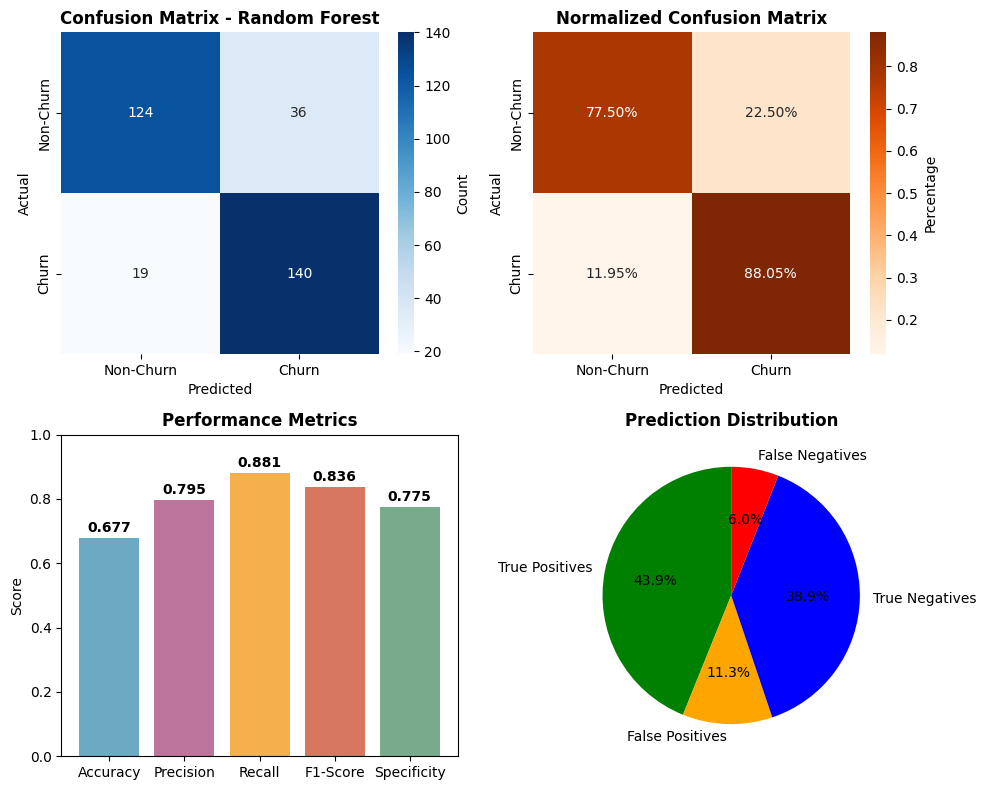

In [29]:
# CONFUSION MATRIX VISUALIZATION
print(f"\n CONFUSION MATRIX ANALYSIS")
print("-" * 50)

cm = confusion_matrix(y_test, y_pred_tuned)
report_dict = classification_report(y_test, y_pred_tuned, target_names=['Non-Churn', 'Churn'], output_dict=True)

# Calculate metrics
#accuracy = accuracy_score(y_test, y_pred_tuned)
precision = report_dict['Churn']['precision']
recall = report_dict['Churn']['recall']
f1 = report_dict['Churn']['f1-score']
specificity = cm[0,0] / (cm[0,0] + cm[0,1])  # TN / (TN + FP)

print(f"Confusion Matrix:")
print(f" Predicted")
print(f" No Churn   Churn")
print(f"Actual No Churn [ TN: {cm[0,0]:>4}    FP: {cm[0,1]:>4} ]")
print(f"Actual Churn    [ FN: {cm[1,0]:>4}    TP: {cm[1,1]:>4} ]")

# Enhanced confusion matrix plot
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Churn', 'Churn'], 
            yticklabels=['Non-Churn', 'Churn'],
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model}', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Normalized confusion matrix
plt.subplot(2, 2, 2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Oranges',
            xticklabels=['Non-Churn', 'Churn'], 
            yticklabels=['Non-Churn', 'Churn'],
            cbar_kws={'label': 'Percentage'})
plt.title(f'Normalized Confusion Matrix', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Metrics comparison
plt.subplot(2, 2, 3)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
metrics_values = [accuracy, precision, recall, f1, specificity]
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E885B']

bars = plt.bar(metrics_names, metrics_values, color=colors, alpha=0.7)
plt.title('Performance Metrics', fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Error analysis
plt.subplot(2, 2, 4)
error_types = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
error_counts = [cm[1,1], cm[0,1], cm[0,0], cm[1,0]]
colors = ['green', 'orange', 'blue', 'red']

plt.pie(error_counts, labels=error_types, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Prediction Distribution', fontweight='bold')

plt.tight_layout()
plt.show()




🎯 3. ROC AND PRECISION-RECALL ANALYSIS
--------------------------------------------------


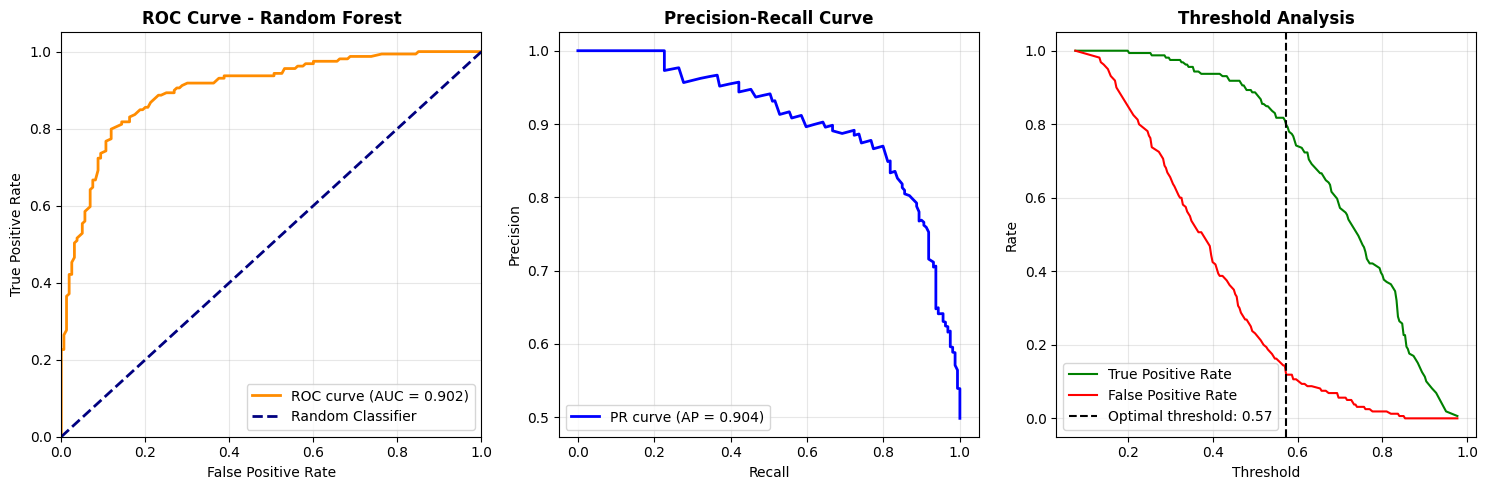

Optimal threshold (Youden's J): 0.573


In [31]:
# 3. ROC AND PRECISION-RECALL CURVES
print(f"\n🎯 3. ROC AND PRECISION-RECALL ANALYSIS")
print("-" * 50)

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_tuned)
auc_score = roc_auc_score(y_test, y_pred_proba_tuned)

# Precision-Recall Curve
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_tuned)
average_precision = average_precision_score(y_test, y_pred_proba_tuned)

plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model}', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recall_curve, precision_curve, color='blue', lw=2, 
         label=f'PR curve (AP = {average_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve', fontweight='bold')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

# Threshold Analysis
plt.subplot(1, 3, 3)
# Find optimal threshold (Youden's J statistic)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds_roc[optimal_idx]

plt.plot(thresholds_roc[1:], tpr[1:], label='True Positive Rate', color='green')
plt.plot(thresholds_roc[1:], fpr[1:], label='False Positive Rate', color='red')
plt.axvline(x=optimal_threshold, color='black', linestyle='--', 
            label=f'Optimal threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Threshold Analysis', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Optimal threshold (Youden's J): {optimal_threshold:.3f}")




 PROBABILITY DISTRIBUTION ANALYSIS
--------------------------------------------------


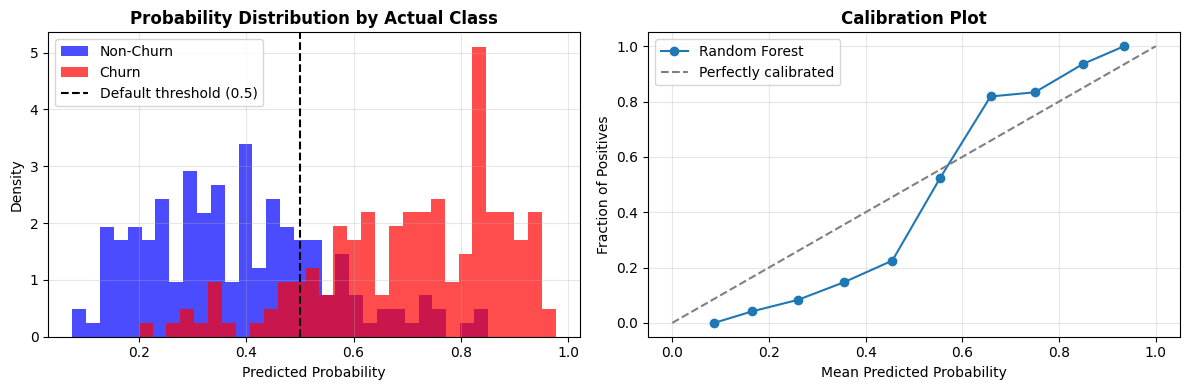

In [33]:
# PROBABILITY DISTRIBUTION ANALYSIS
print(f"\n PROBABILITY DISTRIBUTION ANALYSIS")
print("-" * 50)

plt.figure(figsize=(12, 4))

# Probability distribution by actual class
plt.subplot(1, 2, 1)
plt.hist(y_pred_proba_tuned[y_test == 0], bins=30, alpha=0.7, 
         label='Non-Churn', color='blue', density=True)
plt.hist(y_pred_proba_tuned[y_test == 1], bins=30, alpha=0.7, 
         label='Churn', color='red', density=True)
plt.axvline(x=0.5, color='black', linestyle='--', label='Default threshold (0.5)')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Probability Distribution by Actual Class', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Calibration plot
plt.subplot(1, 2, 2)
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba_tuned, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label=f'{best_model}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [36]:
# SAVE THE BEST MODEL
print(f"\n MODEL PERSISTENCE")
print("-" * 50)

import joblib
import datetime

# Create filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'best_churn_model_{best_model.lower().replace(" ", "_")}_{timestamp}.pkl'

# Save the model
joblib.dump(best_tuned_model, model_filename)
print(f" Best model saved as: {model_filename}")

# Also save the feature names and other metadata
metadata = {
    'feature_names': list(X.columns),
    'model_type': best_model,
    'training_date': timestamp,
    'best_parameters': grid_search.best_params_,
    'performance_metrics': {
        'accuracy': accuracy,
        'auc': auc_score,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
}

metadata_filename = f'model_metadata_{timestamp}.pkl'
joblib.dump(metadata, metadata_filename)
print(f"Model metadata saved as: {metadata_filename}")


 MODEL PERSISTENCE
--------------------------------------------------
 Best model saved as: best_churn_model_random_forest_20251120_012553.pkl
Model metadata saved as: model_metadata_20251120_012553.pkl


In [41]:
# PREDICTION FUNCTION FOR NEW DATA
print(f"\n PREDICTION FUNCTION")
print("-" * 50)

def predict_churn_probability(new_customer_data, model=best_tuned_model, 
                            feature_names=None, probability_threshold=0.5):
    """
    Predict churn probability for new customer data
    
    Parameters:
    - new_customer_data: pandas DataFrame with the same features as training data
    - model: trained model (default: best_tuned_model)
    - feature_names: list of expected feature names (for validation)
    - probability_threshold: threshold for binary classification
    
    Returns:
    - DataFrame with original data + predictions
    """
    
    if not isinstance(new_customer_data, pd.DataFrame):
        raise ValueError("Input should be a pandas DataFrame")
    
    # Validate features
    if feature_names is not None:
        missing_features = set(feature_names) - set(new_customer_data.columns)
        if missing_features:
            raise ValueError(f"Missing features: {missing_features}")
    
    # Make predictions
    probabilities = model.predict_proba(new_customer_data)
    predictions = (probabilities[:, 1] >= probability_threshold).astype(int)
    
    # Create results DataFrame
    results_df = new_customer_data.copy()
    results_df['Churn_Probability'] = probabilities[:, 1]
    results_df['Churn_Prediction'] = predictions
    results_df['Risk_Level'] = pd.cut(probabilities[:, 1], 
                                    bins=[0, 0.3, 0.7, 1], 
                                    labels=['Low', 'Medium', 'High'],
                                    include_lowest=True)
    
    # Add confidence level
    results_df['Confidence'] = np.where(
        probabilities[:, 1] > 0.7, 'High',
        np.where(probabilities[:, 1] > 0.3, 'Medium', 'Low')
    )
    
    return results_df

def load_and_predict(model_path, metadata_path, new_data):
    """
    Load saved model and make predictions
    """
    model = joblib.load(model_path)
    metadata = joblib.load(metadata_path)
    
    print(f"Loaded {metadata['model_type']} model trained on {metadata['training_date']}")
    
    return predict_churn_probability(new_data, model, metadata['feature_names'])

# Create sample prediction (using test data as example)
sample_predictions = predict_churn_probability(X_test)
print(f"\n SAMPLE PREDICTIONS (first 5 test samples):")
print("-" * 80)
print(sample_predictions[['Churn_Probability', 'Churn_Prediction', 'Risk_Level', 'Confidence']].head(100))



 PREDICTION FUNCTION
--------------------------------------------------

 SAMPLE PREDICTIONS (first 5 test samples):
--------------------------------------------------------------------------------
      Churn_Probability  Churn_Prediction Risk_Level Confidence
72             0.733333                 1       High       High
26             0.286667                 0        Low        Low
878            0.170000                 0        Low        Low
1084           0.720000                 1       High       High
932            0.253333                 0        Low        Low
...                 ...               ...        ...        ...
320            0.170000                 0        Low        Low
522            0.253333                 0        Low        Low
431            0.463333                 0     Medium     Medium
128            0.313333                 0     Medium     Medium
1069           0.853333                 1       High       High

[100 rows x 4 columns]
